In [2]:
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras import layers
from sklearn.model_selection import train_test_split
import tensorflow.keras.optimizers as optim
import tensorflow as tf
import matplotlib.pyplot as plt
tf.random.set_seed(2021)

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

4431872/4422102 [==============================] - 0s 0us/step


In [82]:
x_train.shape

(60000, 28, 28)

In [83]:
x_test.shape

(10000, 28, 28)

In [22]:
LR = [0.001,0.01,0.1,0.5,0.9]
LU = [50,100,150]
model = Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(units = LU[0],activation = "relu",input_shape=(784,)))
#model.add(layers.Dense(units = LU[2],activation = "relu")) # layer 2
#model.add(layers.Dense(units = LU[2],activation = "relu")) # layer 3
model.add(layers.Dense(units = 10,activation = "softmax"))

# Optimizers 
#optimizer = optim.Adam(learning_rate = LR[0])
optimizer = optim.SGD(learning_rate = LR[0])
#optimizer = optim.RMSprop(learning_rate = LR[0])

model.compile(loss = "categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"] )
trainModel = model.fit(x_train,y_train,epochs = 10,batch_size = 16,validation_split=0.1) # train,valid split

Epoch 1/10
3375/3375 [==============================] - 8s 2ms/step - loss: 4.0273 - accuracy: 0.2202 - val_loss: 1.8803 - val_accuracy: 0.2482
Epoch 2/10
3375/3375 [==============================] - 7s 2ms/step - loss: 1.8327 - accuracy: 0.2829 - val_loss: 1.7611 - val_accuracy: 0.2530
Epoch 3/10
3375/3375 [==============================] - 7s 2ms/step - loss: 1.7110 - accuracy: 0.3379 - val_loss: 1.6661 - val_accuracy: 0.3422
Epoch 4/10
3375/3375 [==============================] - 7s 2ms/step - loss: 1.6524 - accuracy: 0.3505 - val_loss: 1.6179 - val_accuracy: 0.3522
Epoch 5/10
3375/3375 [==============================] - 7s 2ms/step - loss: 1.6121 - accuracy: 0.3601 - val_loss: 1.6050 - val_accuracy: 0.3477
Epoch 6/10
3375/3375 [==============================] - 7s 2ms/step - loss: 1.5942 - accuracy: 0.3591 - val_loss: 1.5969 - val_accuracy: 0.3532
Epoch 7/10
3375/3375 [==============================] - 7s 2ms/step - loss: 1.5701 - accuracy: 0.3651 - val_loss: 1.5790 - val_accuracy:

In [25]:
LR = [0.001,0.01,0.1,0.5,0.9]
LU = [50,100,150]
model = Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(units = LU[2],activation = "relu",input_shape=(784,)))
model.add(layers.Dense(units = LU[2],activation = "relu")) # layer 2
model.add(layers.Dense(units = LU[2],activation = "relu")) # layer 3
model.add(layers.Dense(units = 10,activation = "softmax"))

# Optimizers 
optimizer = optim.Adam(learning_rate = LR[0])
#optimizer = optim.SGD(learning_rate = LR[3])
#optimizer = optim.RMSprop(learning_rate = LR[0])

model.compile(loss = "categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"] )
trainModel = model.fit(x_train,y_train,epochs = 10,batch_size = 16,validation_split=0.1) # train,valid split

Epoch 1/10
3375/3375 [==============================] - 9s 3ms/step - loss: 1.3393 - accuracy: 0.7238 - val_loss: 0.6090 - val_accuracy: 0.7928
Epoch 2/10
3375/3375 [==============================] - 9s 3ms/step - loss: 0.5462 - accuracy: 0.8074 - val_loss: 0.5813 - val_accuracy: 0.7793
Epoch 3/10
3375/3375 [==============================] - 9s 3ms/step - loss: 0.4807 - accuracy: 0.8299 - val_loss: 0.4781 - val_accuracy: 0.8253
Epoch 4/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.4539 - accuracy: 0.8404 - val_loss: 0.5124 - val_accuracy: 0.8280
Epoch 5/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.4306 - accuracy: 0.8484 - val_loss: 0.4521 - val_accuracy: 0.8395
Epoch 6/10
3375/3375 [==============================] - 8s 3ms/step - loss: 0.4138 - accuracy: 0.8538 - val_loss: 0.4636 - val_accuracy: 0.8388
Epoch 7/10
3375/3375 [==============================] - 8s 2ms/step - loss: 0.4034 - accuracy: 0.8575 - val_loss: 0.4215 - val_accuracy:

In [26]:
y_pred = model.predict(x_test)
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4170 - accuracy: 0.8564


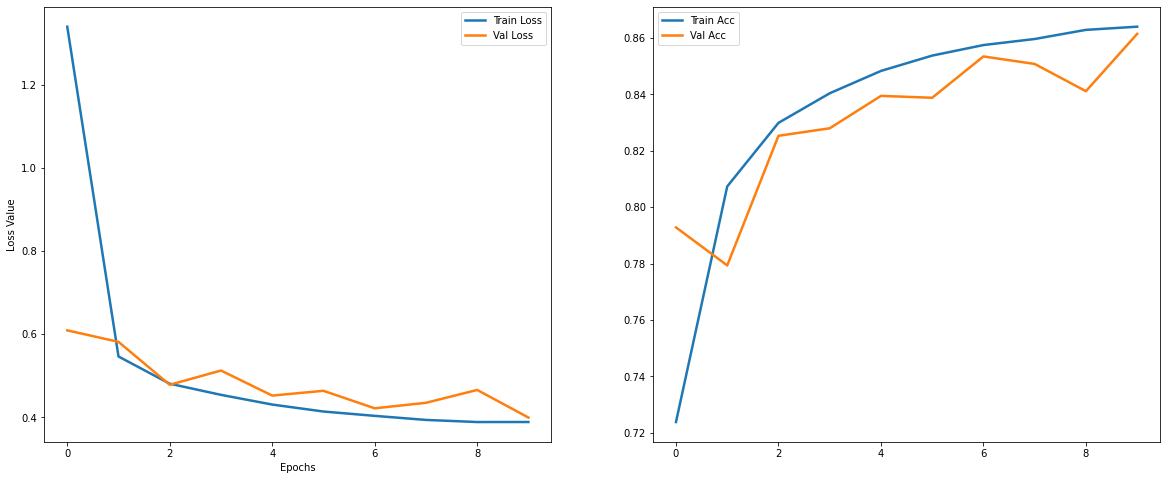

In [27]:
def show_loss_acc(trainMode,figsize = (20,8)):
  history = trainModel.history
  loss = history["loss"]
  acc  = history["accuracy"]
  val_loss = history["val_loss"]
  val_acc = history["val_accuracy"]

  plt.figure(figsize = figsize)

  plt.subplot(1,2,1)
  plt.plot(loss,linewidth = 2.5,label = "Train Loss")
  plt.plot(val_loss,linewidth = 2.5,label = "Val Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss Value")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(acc,linewidth = 2.5,label = "Train Acc")
  plt.plot(val_acc,linewidth = 2.5,label = "Val Acc")
  plt.legend()

show_loss_acc(trainModel)